### Realizar una solución dependiendo de cual data sets sea el que corresponde.

1. Coffee Quality, Links:  https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi o https://github.com/fatih-boyar/coffee-quality-data-CQI.git
2. Data Science Salaries 2023, Link: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
3. Diabetes prediction dataset, Link:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
4. Heart Disease, Link: https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset

### Método para seleccionar el problema

Para saber que problema le toca deberá fijarse en su numero de control y tomar el ultimo digo:

1. Si tu número de control termina en 9 o 5 la problemática a resolver es el 1
2. Si tu número de control termina en 8 o 4 la problemática a resolver es la 2
3. Si tu número de control termina en 7 o 3 la problemática a resolver es la 3
4. Si tu número de control termina en 6 o 2 la problemática a resolver es el 4
5. Si tu número de control termina en 0 o 1 tienes libertad para seleccionar cualquiera de los 4 problemas planteados


### Requerimientos de Solucion:
- Poner tunombre y tu numero de control al jupiter y en un celda como Markdown
- Reliazar la exploracion de los datos para entenderlos, pude usar pandas o numpy
- hacer el modelo predictivo
- No olvidar las validaciones que considere necesarias
- Documentar y/o justificar cualquier decisión que tome en su desarrollo.
- Usar el nombre de variables, de funciones, de ciclos y de programas acorde a la problemática.
- Hacer correllaciones, scatters, heatmaps, boxplot, graficas y todo aquellas graficas que permitan mostrar los resultados



#### Fechas de entrega:
-	16 de junio de 2023.


# Understanding the Data

The following is a checklist and a sequence
of things to learn about your data set to familiarize yourself with the data and
to formulate the predictive model development steps that you want to follow:

- Number of rows and columns
- Number of categorical variables and number of unique values for each
- Missing values
- Summary statistics for attributes and labels

# Escribe tu nombre completo

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
#read wine data sets
def pd_read_wine():
    target_url = ("dataset_heart.csv")
    wine = pd.read_csv(target_url,header=0, sep=",")
    names=wine.columns #Get names of dataset
    tam=len(names)-1
    print("size" ,tam)
    attributes=wine.iloc[:,0:tam]
    targets=wine.iloc[:,tam]
    return names,attributes,targets

In [4]:
names,xlist, labels = pd_read_wine()

size 13


## Metricas para medir el desempeño de los modelos
- Mean squared error - Error cuadratico medio: $MSE= \frac{1}{m}\sum_{i=1}^{m}(x_{i}-pred(x_{i}))^{2} $
- Mean absolute error- Error obsoluto medio: $MAE=\frac{1}{m}\sum_{i=1}^{m}|x_{i}-pred(x_{i})|$

In [5]:
#trainning model whit data set normalization
wineModel=LassoCV(cv=10)
wineModel.fit(xlist, labels)

LassoCV(cv=10)

In [6]:
#proses to normalize data ssets rrememeber that is import because the lassoCv does nor permit use
#normalize option when we define teh lassoCv construcstore
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Train_transformed = scaler.fit_transform(xlist)
wineModel=LassoCV(cv=10)
wineModel.fit(X_Train_transformed, labels)

LassoCV(cv=10)

In [7]:
wineModel=LassoCV(cv=10)
wineModel.fit(X_Train_transformed, labels)

LassoCV(cv=10)

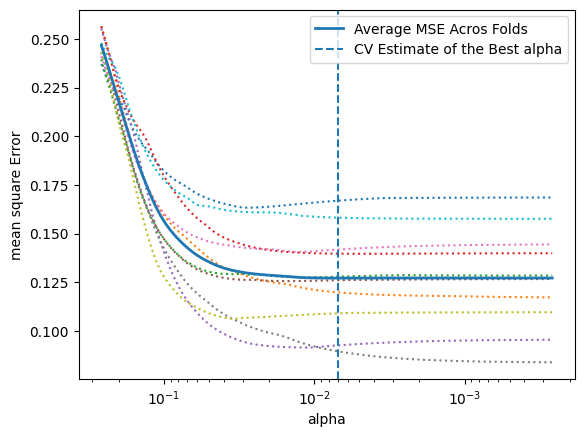

In [8]:
#Display results whit normalization process aply
plt.plot(wineModel.alphas_,wineModel.mse_path_,':')
plt.plot(wineModel.alphas_,wineModel.mse_path_.mean(axis=-1),label='Average MSE Acros Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of the Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("alpha")
plt.ylabel("mean square Error")
plt.show()

## Receiver Operating Characteristics (ROC)

The ROC curve yields a single plot that summarizes all of these different contingency
tables. The ROC curve plots the true positive rate ($TPR=\frac{TP}{TP+FN}$) versus
the false positive rate ($FPR=\frac{FP}{TN+FP}$).
- TPR is the proportion of positive examples that
are correctly classified as positive.
- FPR is the number of FPs
relative to the total number of actual negatives.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


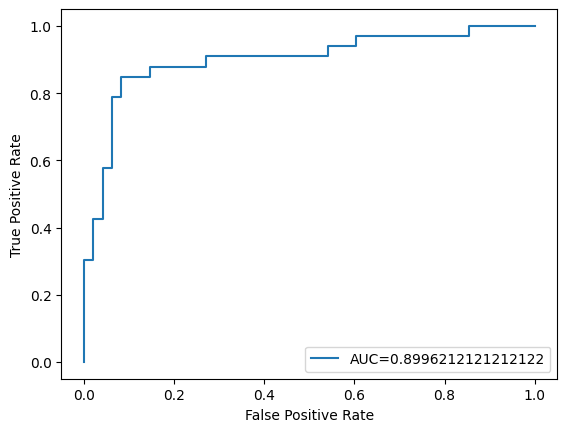

In [55]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(xlist, labels,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test-1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test-1, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LassoCV demo with data normalization and no normalization

In [9]:
#trainning model whit data set normalization
wineModel=LassoCV(cv=10)
wineModel.fit(xlist, labels)

LassoCV(cv=10)

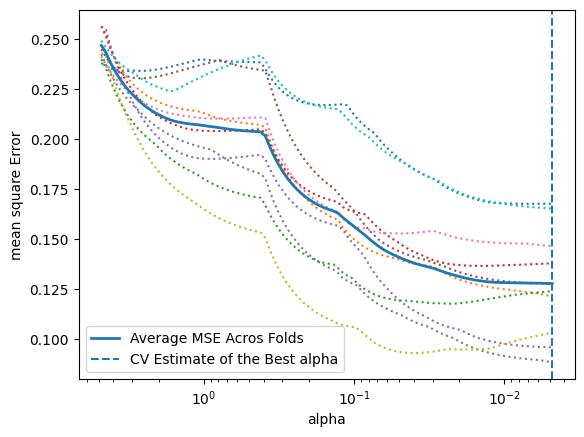

In [10]:
#Display results whit normalization process aply
plt.plot(wineModel.alphas_,wineModel.mse_path_,':')
plt.plot(wineModel.alphas_,wineModel.mse_path_.mean(axis=-1),label='Average MSE Acros Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of the Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("alpha")
plt.ylabel("mean square Error")
plt.show()

### Lasso Training on Full Data Set

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, lasso_path, Lasso
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
def pd_read_wine():
    target_url = ("dataset_heart.csv")
    wine = pd.read_csv(target_url,header=0, sep=",")
    names=wine.columns #Get names of dataset
    tam=len(names)-1
    print("size" ,tam)
    attributes=wine.iloc[:,0:tam]
    targets=wine.iloc[:,tam]
    return names,attributes,targets

In [13]:
#Read data
names, xList, labels = pd_read_wine()

size 13


In [14]:
#first let's see tha coefficient curves for the full data set and get a feel for variable importance
#For variable importance you'll need to normalize the variable before fitting otherwise the model will
#return coefficients relative to full scale variable which is what you need for aplplying model
#but to determine importance you need coefficient on normalized features
#lasso_path doesn't have a build-in normalice option
alphas, coefs, _ = lasso_path(StandardScaler().fit_transform(xList), labels)

In [15]:
alphas

array([2.60884701e-01, 2.43301945e-01, 2.26904208e-01, 2.11611624e-01,
       1.97349709e-01, 1.84048999e-01, 1.71644713e-01, 1.60076433e-01,
       1.49287818e-01, 1.39226318e-01, 1.29842930e-01, 1.21091951e-01,
       1.12930759e-01, 1.05319604e-01, 9.82214152e-02, 9.16016205e-02,
       8.54279779e-02, 7.96704181e-02, 7.43008986e-02, 6.92932667e-02,
       6.46231324e-02, 6.02677496e-02, 5.62059050e-02, 5.24178151e-02,
       4.88850298e-02, 4.55903424e-02, 4.25177059e-02, 3.96521548e-02,
       3.69797323e-02, 3.44874221e-02, 3.21630853e-02, 2.99954010e-02,
       2.79738114e-02, 2.60884701e-02, 2.43301945e-02, 2.26904208e-02,
       2.11611624e-02, 1.97349709e-02, 1.84048999e-02, 1.71644713e-02,
       1.60076433e-02, 1.49287818e-02, 1.39226318e-02, 1.29842930e-02,
       1.21091951e-02, 1.12930759e-02, 1.05319604e-02, 9.82214152e-03,
       9.16016205e-03, 8.54279779e-03, 7.96704181e-03, 7.43008986e-03,
       6.92932667e-03, 6.46231324e-03, 6.02677496e-03, 5.62059050e-03,
      

In [16]:
coefs

array([[ 0.        ,  0.        ,  0.        , ..., -0.01619074,
        -0.01624206, -0.01628991],
       [ 0.        ,  0.        ,  0.        , ...,  0.07422835,
         0.07424728,  0.07426494],
       [ 0.        ,  0.        ,  0.        , ...,  0.08891897,
         0.08892547,  0.08893153],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.02902141,
         0.02903347,  0.02904472],
       [ 0.        ,  0.        ,  0.        , ...,  0.12698166,
         0.12700628,  0.12702924],
       [ 0.        ,  0.01758276,  0.03398049, ...,  0.11521165,
         0.11521016,  0.11520877]])

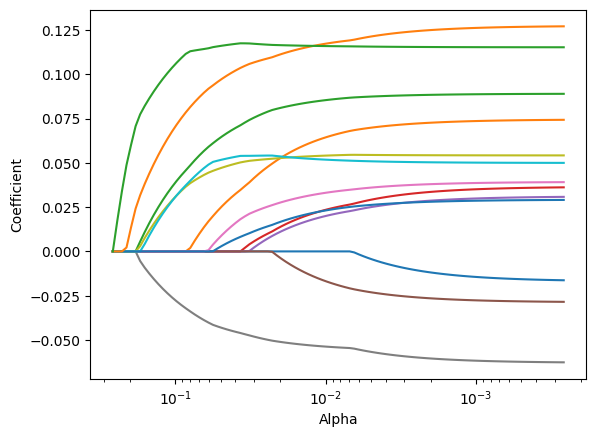

In [17]:
plt.semilogx(alphas,coefs.T)
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.axis('tight')
ax=plt.gca()
ax.invert_xaxis()
plt.savefig('WineLassoCoefCuerve.png', dpi=500)
plt.show()

In [18]:
#find coefficient ordering
nattr,nalph=coefs.shape
print('Numero de atributos: ', nattr)
print('Numero de coefficientes', nalph, 'debe coincidir con el numero de alphas', alphas.shape)
nzList=[]
for iAlpha in range(1,nalph):
    coefList=coefs[:,iAlpha]
    nzCoef=[index for index in range (nattr) if coefList[index]!=0.0]
    for i in nzCoef:
        if not (i in nzList):
            nzList.append(i)
print('Features Ordened by how Early They WEnter the model: ')
[print(names[nzList[x]]) for x in range(len(nzList))]

Numero de atributos:  13
Numero de coefficientes 100 debe coincidir con el numero de alphas (100,)
Features Ordened by how Early They WEnter the model: 
thal
major vessels
chest pain type
max heart rate
exercise induced angina
oldpeak
sex 
resting electrocardiographic results
ST segment
resting blood pressure
serum cholestoral
fasting blood sugar
age


[None, None, None, None, None, None, None, None, None, None, None, None, None]